# Import Data

## Pandas ta

In [2]:
import pandas as pd
import numpy as np 
import pandas_ta as ta

In [3]:
df = pd.read_csv('Data\meta_1.csv')

df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [4]:
# (1) Create the Strategy
MyStrategy = ta.Strategy(
    name="DCSMA10",
    ta=[
        {"kind": "ohlc4"},
        {"kind": "sma", "length": 10},
        {"kind": "donchian", "lower_length": 10, "upper_length": 15},
        {"kind": "ema", "close": "OHLC4", "length": 10, "suffix": "OHLC4"},
    ]
)

# (2) Run the Strategy
df.ta.strategy(MyStrategy)

In [5]:
df[11:20]

,datetime,symbol,open,high,low,close,volume,OHLC4,SMA_10,DCL_10_15,DCM_10_15,DCU_10_15,EMA_10_OHLC4
11,2021-01-06 01:30:00,NASDAQ:META,270.34,271.76,270.34,271.74,27723.0,271.0450,269.714,265.25,NaN,NaN,270.002999
12,2021-01-06 02:30:00,NASDAQ:META,271.72,272.04,270.78,270.82,34187.0,271.3400,270.101,265.94,NaN,NaN,270.246090
13,2021-01-06 03:30:00,NASDAQ:META,270.76,271.44,270.57,270.93,44533.0,270.9250,270.350,268.01,NaN,NaN,270.369528
14,2021-01-06 21:30:00,NASDAQ:META,261.61,266.73,260.01,266.54,266892.0,263.7225,270.076,260.01,267.335,274.66,269.160978
15,2021-01-06 22:30:00,NASDAQ:META,266.42,267.70,266.16,267.17,161765.0,266.8625,269.966,260.01,266.290,272.57,268.743073
16,2021-01-06 23:30:00,NASDAQ:META,267.23,267.23,265.10,265.78,62917.0,266.3350,269.646,260.01,266.195,272.38,268.305241
17,2021-01-07 00:30:00,NASDAQ:META,265.91,266.40,264.68,265.19,102329.0,265.5450,269.036,260.01,266.195,272.38,267.803379
18,2021-01-07 01:30:00,NASDAQ:META,265.22,266.60,264.76,265.00,44588.0,265.3950,268.371,260.01,266.195,272.38,267.365492
19,2021-01-07 02:30:00,NASDAQ:META,265.04,265.92,263.48,264.88,54525.0,264.8300,267.837,260.01,266.195,272.38,266.904494


## Trading View TA

In [6]:
# find exchange and symbols : https://tvdb.brianthe.dev/
from tradingview_ta import TA_Handler, Interval, Exchange

handler = TA_Handler(
    symbol="META",
    exchange="NASDAQ",
    screener="america",
    interval="1h",
    timeout=None
)
analysis = handler.get_analysis()

In [7]:
analysis.summary

{'RECOMMENDATION': 'BUY', 'BUY': 13, 'SELL': 3, 'NEUTRAL': 10}

# Data Preprocessing

In [8]:
# extract data 
main_df = df[df['datetime'] > '2023']
main_df

,datetime,symbol,open,high,low,close,volume,OHLC4,SMA_10,DCL_10_15,DCM_10_15,DCU_10_15,EMA_10_OHLC4
3515,2023-01-03 21:30:00,NASDAQ:META,122.80,126.35,122.300,123.045,368686.0,123.62375,119.7770,117.75,122.050,126.35,119.960429
3516,2023-01-03 22:30:00,NASDAQ:META,123.11,124.65,122.600,124.650,206537.0,123.75250,120.1795,117.75,122.050,126.35,120.649896
3517,2023-01-03 23:30:00,NASDAQ:META,124.64,124.64,123.570,123.920,139143.0,124.19250,120.5515,117.75,122.050,126.35,121.294006
3518,2023-01-04 00:30:00,NASDAQ:META,123.95,124.58,123.670,124.530,88557.0,124.18250,121.1535,118.30,122.325,126.35,121.819187
3519,2023-01-04 01:30:00,NASDAQ:META,124.54,125.03,124.150,124.720,98212.0,124.61000,121.7495,118.50,122.425,126.35,122.326607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,2024-01-11 23:30:00,NASDAQ:META,363.14,365.64,362.950,365.060,250241.0,364.19750,368.7230,359.06,366.005,372.95,366.706133
5311,2024-01-12 00:30:00,NASDAQ:META,365.16,368.33,364.950,367.860,209034.0,366.57500,368.8490,362.95,367.950,372.95,366.682291
5312,2024-01-12 01:30:00,NASDAQ:META,367.89,369.95,367.750,369.870,184043.0,368.86500,369.0000,362.95,367.950,372.95,367.079147
5313,2024-01-12 02:30:00,NASDAQ:META,369.91,371.41,369.550,370.160,312276.0,370.25750,368.9130,362.95,367.950,372.95,367.657029


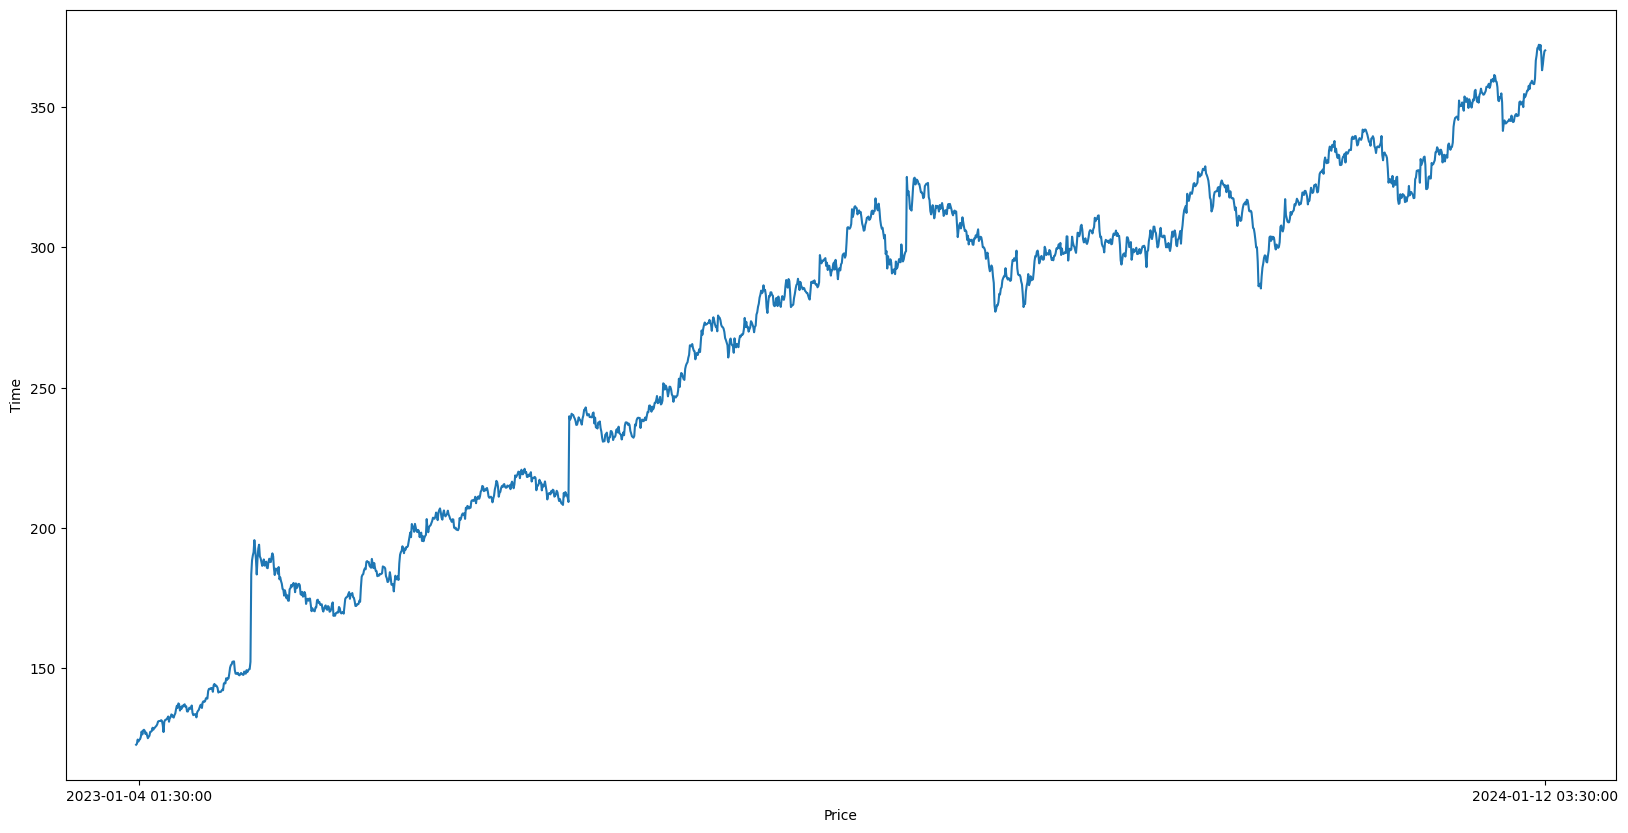

In [25]:
import matplotlib.pyplot as  plt 

plt.figure(figsize=(20, 10))
plt.plot(main_df['datetime'], main_df['open'])
plt.xlabel("Price")
plt.ylabel("Time")

plt.xticks(['2024-01-12 03:30:00', '2023-01-04 01:30:00'])
plt.show()

## Regional locals with  rolling window

In [42]:
'''
- Find max and min regional locals using rolling window algorithm
'''

class RollingWindow : 
    def __init__(self, ys, w, pflag, xs) :
        self.ys = ys.tolist()
        self.w = w
        self.pflag = pflag
        self.xs = xs.tolist()

    
    # find the dictionary of regional locals 
    def find_dict_regional_locals(self, id) : 
        res = {}
        
        l = len(self.ys)
        for t in range(self.w + 1, l - self.w + 1) : 
            if id == True and self.ys[t] > max(self.ys[t - self.w : t]) and self.ys[t] > max(self.ys[t+1 : t + self.w + 1]) :
                res[self.xs[t]] = self.ys[t]

            if id == False and self.ys[t] < min(self.ys[t - self.w : t]) and self.ys[t] < min(self.ys[t+1 : t + self.w + 1]) : 
                res[self.xs[t]] = self.ys[t]

        return res

    # draw graph with regional locals 
    def show_graph(self, id) : 
        res = self.find_dict_regional_locals(id)

        plt.figure(figsize=(20, 10))
        plt.plot(self.xs, self.ys)
        plt.plot(res.keys(), res.values(), marker='o', linestyle='')
        plt.xlabel("Price")
        plt.ylabel("Time")

        plt.xticks(['2024-01-12 03:30:00', '2023-01-04 01:30:00'])
        plt.show()
    
    
    def find_regional_locals_max (self) : 
        if (self.pflag) : 
            self.show_graph(id =  True)
        else : 
            r = self.find_dict_regional_locals(id = True)
            print(r)


    def find_regional_locals_min (self) : 
        if (self.pflag) : 
            self.show_graph(id = False)
        else : 
            r = self.find_dict_regional_locals(id = False)
            print(r)

    

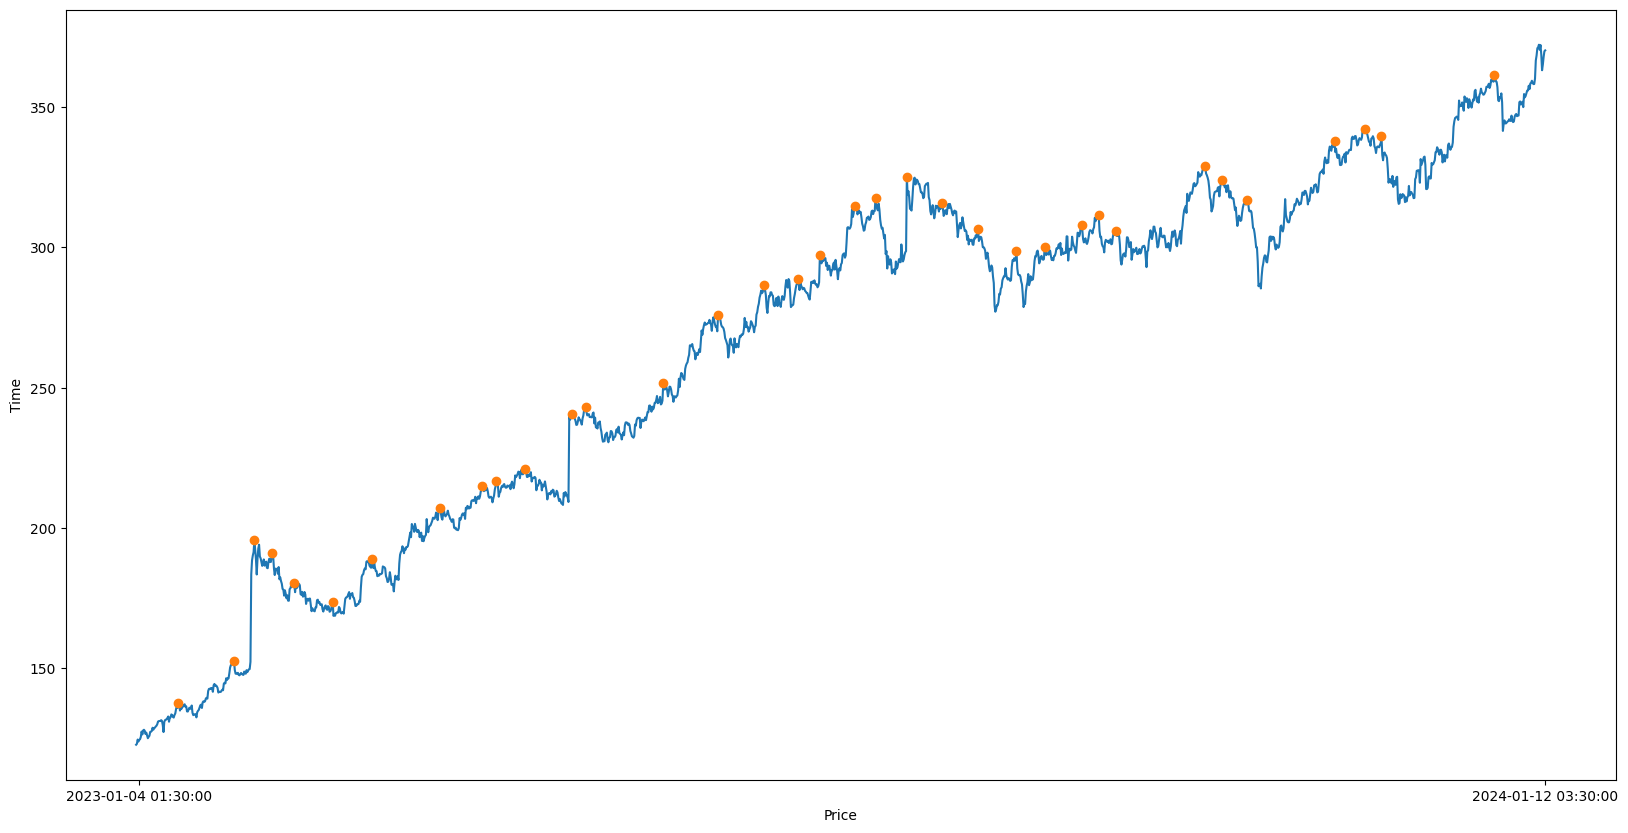

In [43]:
rw = RollingWindow(main_df['open'], 15, True, main_df['datetime'])
rw.find_regional_locals_max()

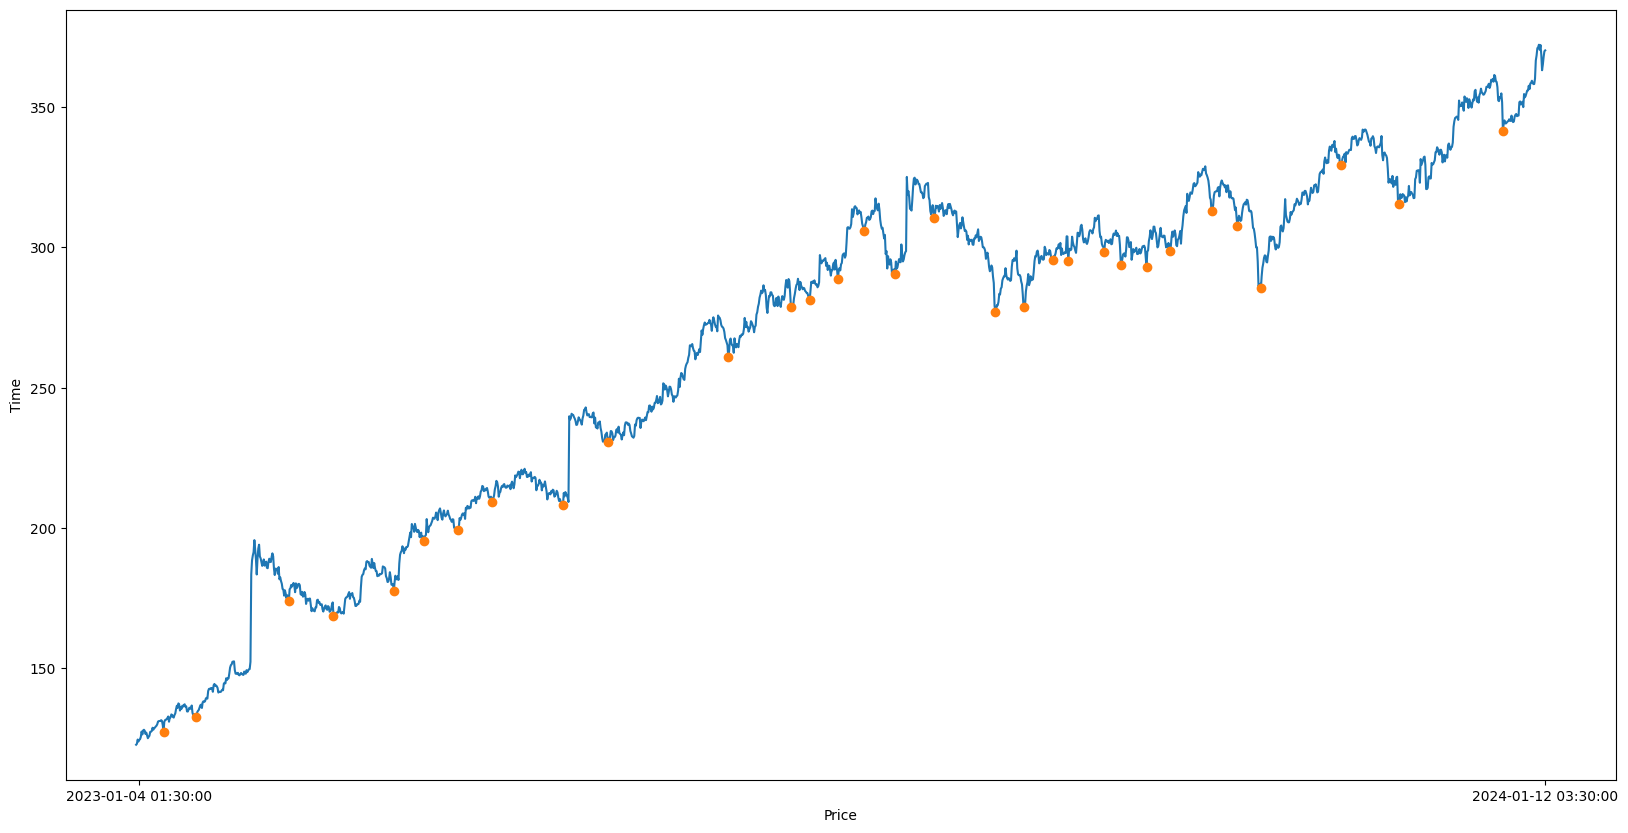

In [44]:
rw.find_regional_locals_min()